### Agentic RAG

RAG + Decision-Making + Feedback Loop

It’s not just retrieval — the model acts as an agent that can:
* Decide when to use retrieval tools
* Judge if retrieved info is relevant
* Rewrite a question if results are poor
* Generate a final answer from good info

So instead of a fixed RAG pipeline, you have a looping decision graph that improves query handling intelligently.

In [54]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["LANGSMITH_API_KEY"]=os.getenv("LANGSMITH_API_KEY")

In [5]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS



d:\ApesAI\1M_Addon_AIML\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [20]:
urls=[
    "https://docs.langchain.com/oss/python/langgraph/overview",
    "https://docs.langchain.com/oss/python/langgraph/application-structure",
    "https://docs.langchain.com/oss/python/langgraph/add-memory"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangGraph v1.0Release notesMigration guideGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureStudioTestDeployAgent Chat UIObservabilityLangGraph APIsGraph APIFunctional APIRuntimeOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy pageCopy pageLangGraph v1.0 is now available!For a complete 

In [21]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retriever=vectorstore.as_retriever()

In [25]:
!pip install langchain


  Attempting uninstall: langgraph-prebuilt

    Found existing installation: langgraph-prebuilt 1.0.1

    Uninstalling langgraph-prebuilt-1.0.1:

      Successfully uninstalled langgraph-prebuilt-1.0.1

   ---------------------------------------- 0/3 [langgraph-prebuilt]
  Attempting uninstall: langgraph
   ---------------------------------------- 0/3 [langgraph-prebuilt]
    Found existing installation: langgraph 1.0.1
   ---------------------------------------- 0/3 [langgraph-prebuilt]
    Uninstalling langgraph-1.0.1:
   ---------------------------------------- 0/3 [langgraph-prebuilt]
   ------------- -------------------------- 1/3 [langgraph]
      Successfully uninstalled langgraph-1.0.1
   ------------- -------------------------- 1/3 [langgraph]
   ------------- -------------------------- 1/3 [langgraph]
   ------------- -------------------------- 1/3 [langgraph]
   ------------- -------------------------- 1/3 [langgraph]
   ------------- -------------------------- 1/3 [langgr

In [27]:
!pip install langchain_classic

In [37]:
### Retriever To Retriever Tools
from langchain_classic.tools.retriever import create_retriever_tool

retriever_tool_1=create_retriever_tool(
    retriever,
    "retriever_vector_langchain", 
    "Search and run information about Langgraph"
)

In [38]:
retriever_tool_1

Tool(name='retriever_vector_langchain', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000002044ADAD000>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002044B3F7310>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000002044A7E1000>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002044B3F7310>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}')

### Langchain Blogs- Seperate Vector Store


In [34]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'LangChain overview - Docs by LangChain', 'language': 'en'}, page_content='LangChain overview - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangChain overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangChain v1.0Release notesMigration guideGet startedInstallQuickstartPhilosophyCore componentsAgentsModelsMessagesToolsShort-term memoryStreamingMiddlewareStructured outputAdvanced usageGuardrailsRuntimeContext engineeringModel Context Protocol (MCP)Human-in-the-loopMulti-agentRetrievalLong-term memoryUse in productionStudioTestDeployAgent Chat UIObservabilityOn this page Install Create an agent Core benefitsLangChain overviewCopy pageCopy pageLangChain v1.0 is now available!For a

In [35]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [39]:
from langchain_classic.tools.retriever import create_retriever_tool

retriever_tool_2=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain",
    "Search and run information about Langchain"
)

In [40]:
tools=[retriever_tool_1,retriever_tool_2]

| Concept                 | **Retriever**                                                    | **Retriever Tool**                                                                 |
| ----------------------- | ---------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **What it is**          | A *function* that fetches relevant documents from a vector store | A *LangChain tool object* that wraps the retriever so an **LLM agent** can call it |
| **Who uses it**         | You (the developer) or a static pipeline                         | The **LLM agent** during reasoning                                                 |
| **Input / Output**      | Input: text query → Output: list of Documents                    | Input: text query → Output: same list of Documents, but via a “tool call”          |
| **Role in Agentic RAG** | Performs retrieval (backend logic)                               | Exposes that retrieval as an *action* the agent can choose                         |
| **How it’s created**    | `vectorstore.as_retriever()`                                     | `create_retriever_tool(retriever, name, description)`                              |


### LangGraph Workflow

In [41]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

It could be a list, tuple, or any ordered iterable — it’s more flexible and type-safe.

Each element must be a subclass of BaseMessage (e.g., HumanMessage, AIMessage, etc.).

In [42]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-20b")
llm.invoke("Hi")

AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond to a greeting. The user says "Hi". We can greet back, maybe ask how we can help.'}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 72, 'total_tokens': 119, 'completion_time': 0.04733882, 'prompt_time': 0.003401533, 'queue_time': 0.003179654, 'total_time': 0.050740353}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_80501ff3a1', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--0dfb2c4b-c338-4466-b845-7436f30dcc8b-0', usage_metadata={'input_tokens': 72, 'output_tokens': 47, 'total_tokens': 119})

In [44]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="openai/gpt-oss-20b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [56]:
LANGSMITH_API_KEY = os.getenv('LANGSMITH_API_KEY')

In [ ]:
from langsmith import Client


In [60]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict


from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [61]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    # Defines a small pydantic model grade to ensure output is "yes" or "no"
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="openai/gpt-oss-20b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [76]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    #prompt = hub.pull("rlm/rag-prompt")
    client = Client(api_key=LANGSMITH_API_KEY)
    prompt = client.pull_prompt("rlm/rag-prompt", include_model=True)
    # LLM
    llm = ChatGroq(model="openai/gpt-oss-20b")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [77]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="openai/gpt-oss-20b")
    response = model.invoke(msg)
    return {"messages": [response]}

1. Agent node runs first
* Decides if it needs to call a retrieval tool or not.

2. Retrieve node runs (if agent decides “use tool”)
* Calls the retriever to fetch documents.

3. Grade_documents runs next
* Checks if the retrieved documents are relevant.
* Decision:
    </br>"yes" → go to generate → produce answer.
    </br>"no" → go to rewrite → produce a better question.
4. Rewrite node runs (if docs weren’t relevant)
* LLM reformulates the question.
* Returns rewritten question to the agent, which can then retry retrieval.

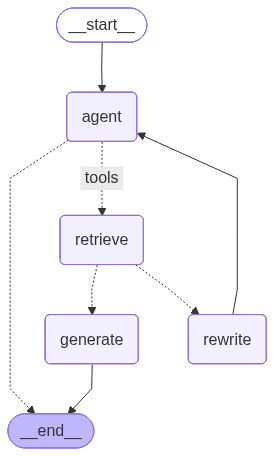

In [78]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool_1,retriever_tool_2])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [83]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='b5c31a51-c1d7-4636-9196-77092c1affee'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks: "What is Langgraph?" We have a tool for searching information about Langgraph. We should use the function. There\'s a function "retriever_vector_langchain" that searches. It seems both functions are same name but different namespace? Actually both are defined same name but maybe different? The first is "namespace functions { // Search and run information about Langgraph type retriever_vector_langchain = ... }" The second is same. It might be a mistake. We should call the function with query "Langgraph". The function returns any. We\'ll call it.', 'tool_calls': [{'id': 'fc_b4c63fa3-3442-406d-b403-f6609ae89cb8', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_vector_langchain'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completi

In [84]:
graph.invoke({"messages":"langgrap hmemory"})

---CALL AGENT---


{'messages': [HumanMessage(content='langgrap hmemory', additional_kwargs={}, response_metadata={}, id='a8e60874-27ad-4454-967b-c59807d62876'),
  AIMessage(content='## LangGraph Memory 101\n\nLangGraph treats **memory** as the “state” that flows through the graph.  \nIt is what lets nodes see the conversation history, user context, and any\narbitrary data you want to persist across turns.\n\nBelow is a quick‑start guide that covers:\n\n| Feature | What it does | Typical use‑case |\n|---------|--------------|-----------------|\n| **Node‑level memory** | Each node can read/write to a local key/value store. | Keep track of a user’s current “stage” or “intent”. |\n| **Global (graph‑level) memory** | A shared store that all nodes can read/write. | Store a user profile, session ID, or a vector index. |\n| **Memory Manager** | Handles persistence, serialization, and retrieval (e.g. RAG). | Store long‑term facts, retrieve relevant docs. |\n| **Retrieval‑augmented memory** | Combines vector stor

In [81]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='179f0c66-4401-4380-95ea-9f2978ea555e'),
  AIMessage(content='**Machine Learning (ML)** is a subfield of artificial intelligence that focuses on building systems that can learn patterns from data and improve their performance over time without being explicitly programmed for every possible situation.\n\n### Core ideas\n\n| Concept | What it means |\n|---------|---------------|\n| **Learning** | The system adapts its internal model based on past observations (data). |\n| **Model** | A mathematical representation (e.g., a neural network, decision tree) that maps inputs to outputs. |\n| **Training** | The process of feeding data to the model so it adjusts its parameters to reduce prediction error. |\n| **Generalization** | The model’s ability to make accurate predictions on new, unseen data. |\n| **Evaluation** | Measuring performance using metrics (accuracy, precision, recall, R